 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort and display first 5 rows
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

# Count nulls again
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort and display first 5 rows
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

# Count nulls again
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort and display first 5 rows
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Replace any instance of a literal "$" with empty space within "Close" column
sp500_history_df["Close"] = sp500_history_df["Close"].replace({'\$' : ''} , regex=True)

# Use astype to change data type
sp500_history_df = sp500_history_df.astype({"Close": float})

sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})

sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")

combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

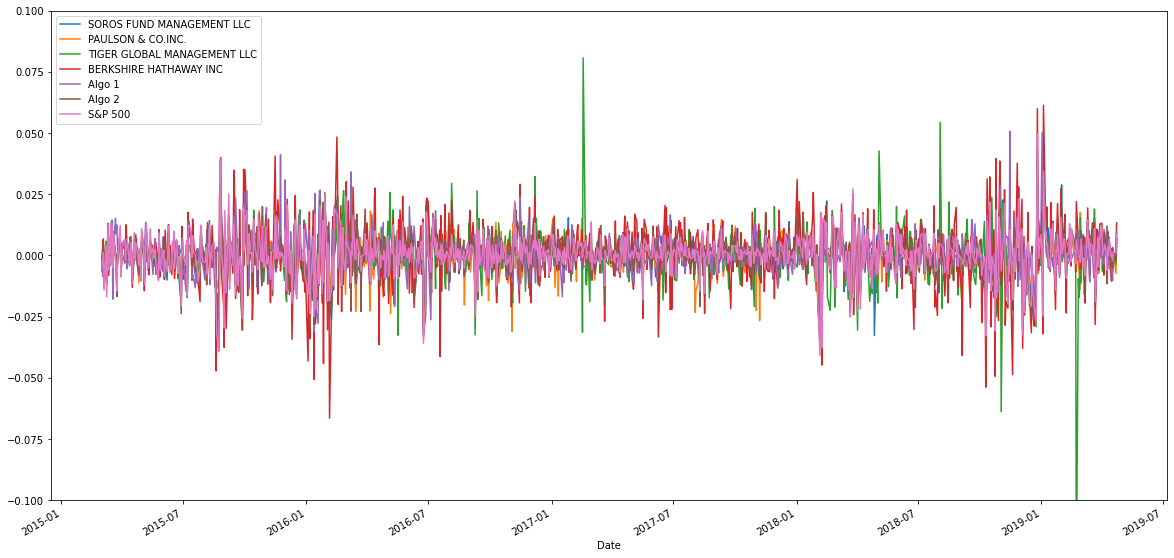

In [15]:
# Plot daily returns
combined_returns_df.plot(ylim=[-0.1,0.1], figsize=(20,10))

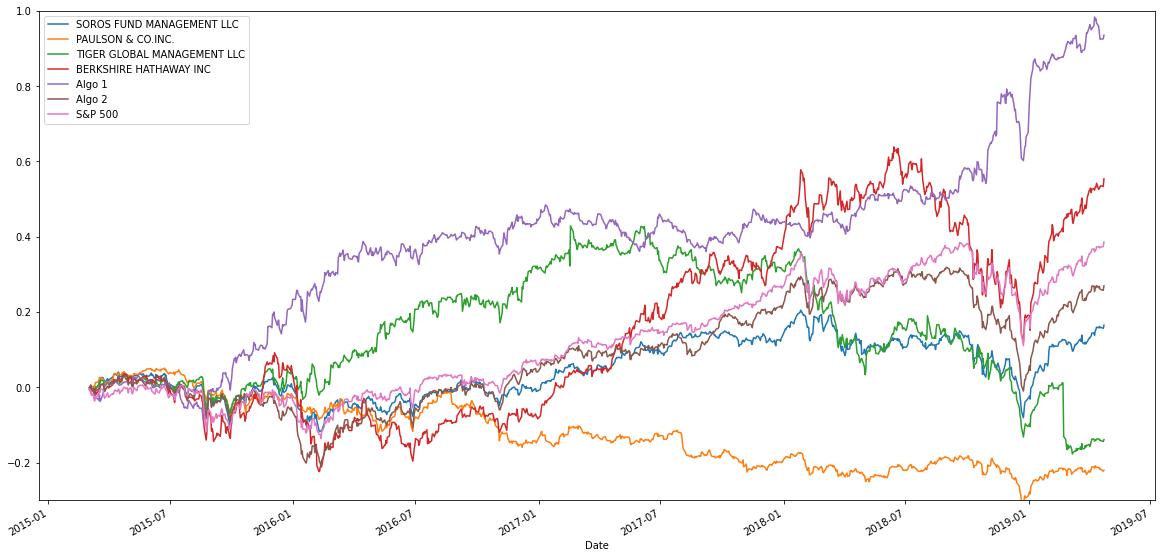

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
cumulative_returns.plot(ylim=[-0.3,1], figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

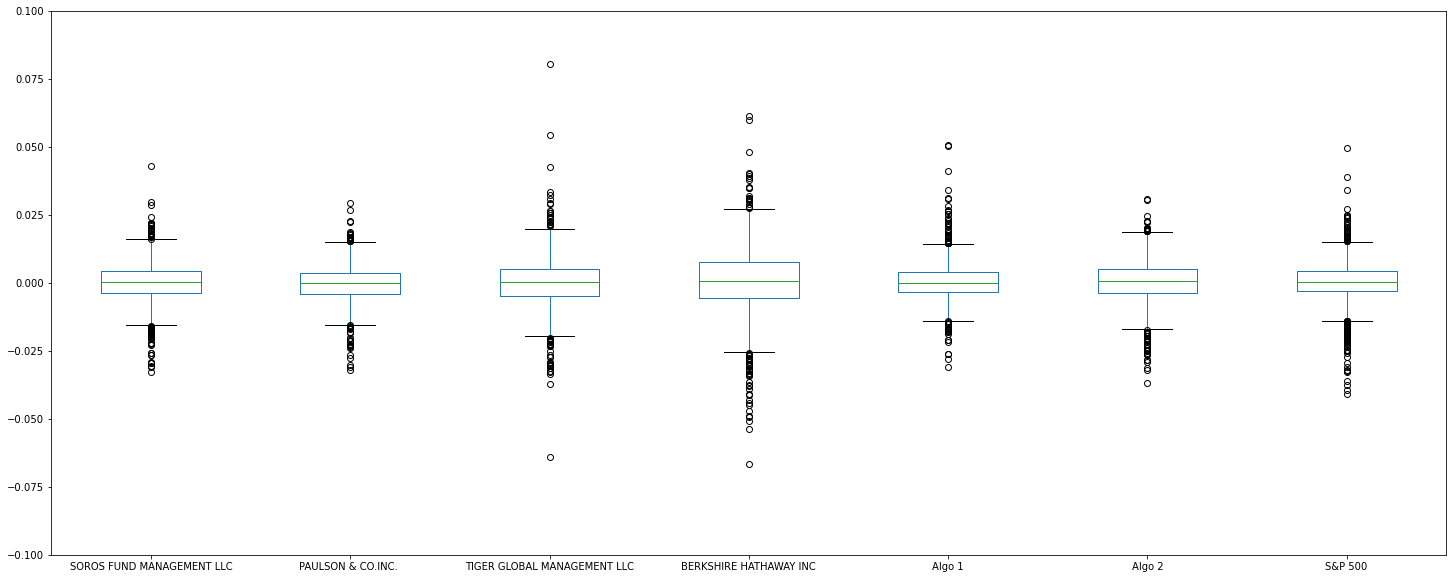

In [17]:
# Box plot to visually show risk
combined_returns_df.plot.box(ylim=[-0.1,0.1], figsize=(25,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_std = combined_returns_df.std()

combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = combined_std["S&P 500"]

sp500_riskier = combined_std > sp500_std

sp500_riskier

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_combined_std = combined_std * np.sqrt(252)

annualized_combined_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

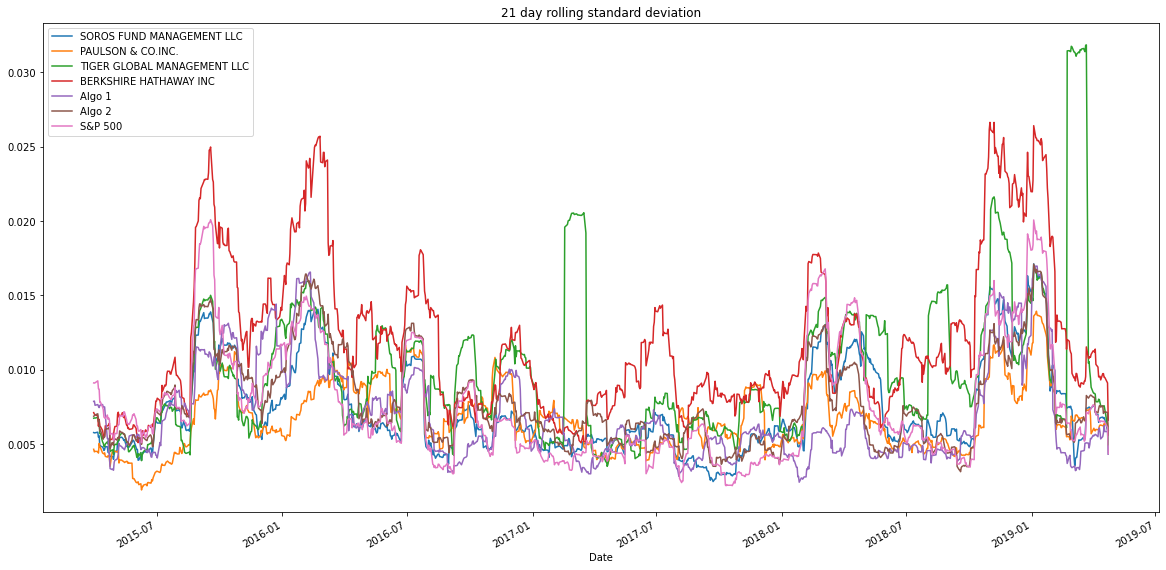

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
window = 21

combined_std_21 = combined_returns_df.rolling(window=window).std()

combined_std_21.plot(figsize=(20,10), title="21 day rolling standard deviation")

In [22]:
# Construct a correlation table
combined_std_correlation = combined_returns_df.corr()
combined_std_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


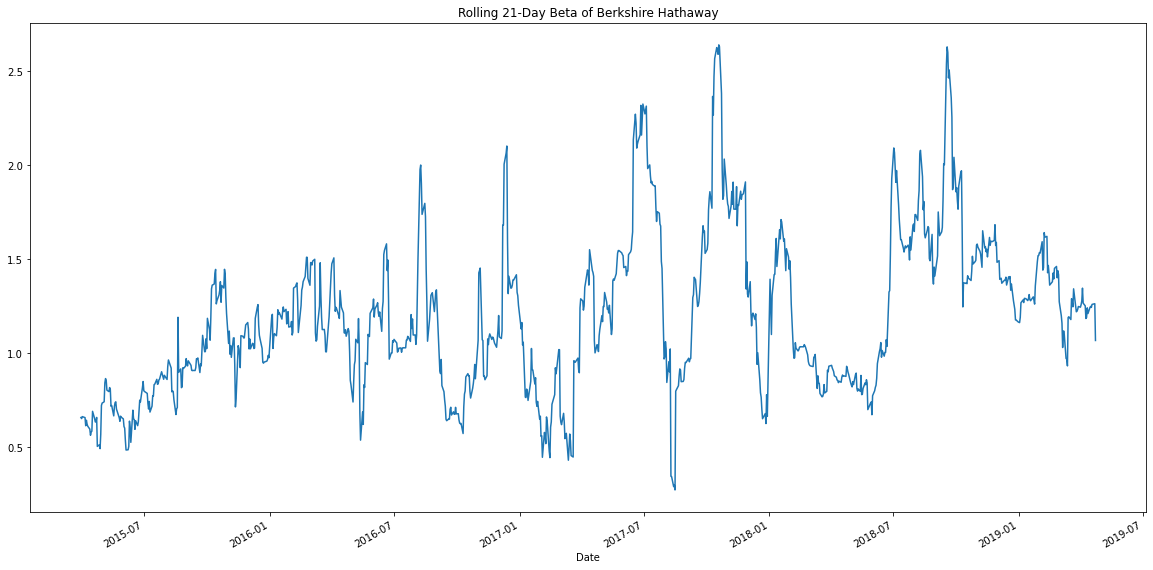

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_brka_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=window).cov(combined_returns_df['S&P 500'])
rolling_variance = combined_returns_df['S&P 500'].rolling(window=window).var()

rolling_brka_beta = rolling_brka_covariance / rolling_variance
rolling_brka_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Berkshire Hathaway')

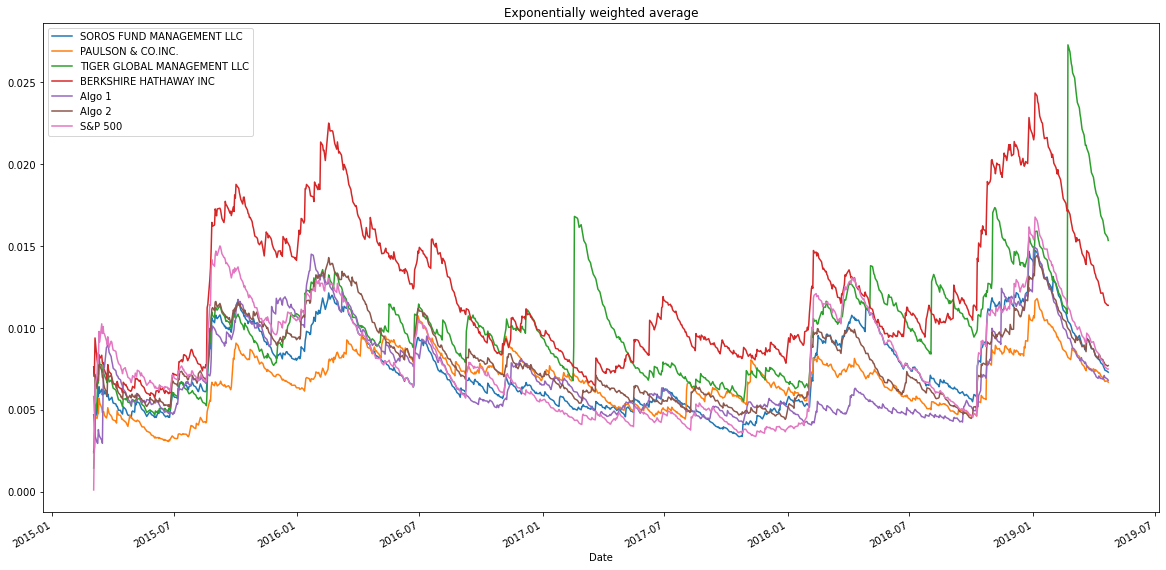

In [24]:
# Calculate a rolling window using the exponentially weighted moving average.

ewm_df = combined_returns_df.ewm(halflife=window).std()
ewm_df.plot(figsize=(20,10), title="Exponentially weighted average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

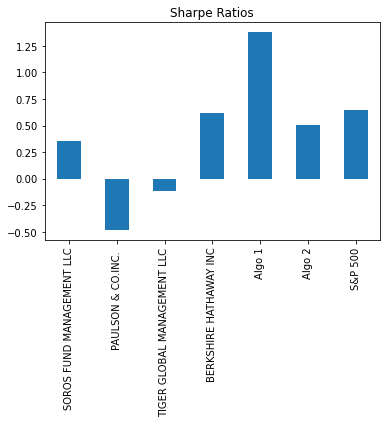

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
adm_csv = Path("Resources/portfolio/adm.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
adm_df = pd.read_csv(adm_csv)

# Remove ' hour:minute:second' from "date" column
adm_df["Date"] = adm_df["Date"].replace({'\s\d{2}:\d{2}:\d{2}' : ''}, regex=True)

# Format date column
adm_df["Date"]= pd.to_datetime(adm_df["Date"])

# Append symbol column
adm_df['Symbol'] = 'ADM'

# Set date column as index
adm_df = adm_df.set_index("Date")

In [28]:
# Read the second stock
ebs_csv = Path("Resources/portfolio/ebs.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
ebs_df = pd.read_csv(ebs_csv)

# Remove ' hour:minute:second' from "date" column
ebs_df["Date"] = ebs_df["Date"].replace({'\s\d{2}:\d{2}:\d{2}' : ''}, regex=True)

# Format date column
ebs_df["Date"]= pd.to_datetime(ebs_df["Date"])

# Append symbol column
ebs_df['Symbol'] = 'EBS'

# Set date column as index
ebs_df = ebs_df.set_index("Date")

In [29]:
# Read the third stock
goog_csv = Path("Resources/portfolio/goog.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
goog_df = pd.read_csv(goog_csv)

goog_df["Date"] = goog_df["Date"].replace({'\s\d{2}:\d{2}:\d{2}' : ''}, regex=True)

goog_df["Date"]= pd.to_datetime(goog_df["Date"])

goog_df['Symbol'] = 'GOOG'

goog_df = goog_df.set_index("Date")

In [30]:
# Read the fourth stock
nvda_csv = Path("Resources/portfolio/nvda.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
nvda_df = pd.read_csv(nvda_csv)

nvda_df["Date"] = nvda_df["Date"].replace({'\s\d{2}:\d{2}:\d{2}' : ''}, regex=True)

nvda_df["Date"]= pd.to_datetime(nvda_df["Date"])

nvda_df['Symbol'] = 'NVDA'

nvda_df = nvda_df.set_index("Date")

In [31]:
# Concatenate all stocks into a single DataFrame
portfolio_df = pd.concat([adm_df, ebs_df, goog_df, nvda_df], axis="rows")

portfolio_df.head()

,Close,Symbol
Date,,
2014-01-02,42.99,ADM
2014-01-03,43.19,ADM
2014-01-06,43.28,ADM
2014-01-07,42.85,ADM
2014-01-08,42.36,ADM


In [32]:
# Reset the index
portfolio_df = portfolio_df.reset_index()
portfolio_df.head()

,Date,Close,Symbol
0,2014-01-02,42.99,ADM
1,2014-01-03,43.19,ADM
2,2014-01-06,43.28,ADM
3,2014-01-07,42.85,ADM
4,2014-01-08,42.36,ADM


In [33]:
# Pivot so that each column of prices represents a unique symbol
portfolio_df = portfolio_df.pivot(index="Date", columns="Symbol", values="Close")
portfolio_df

Symbol,ADM,EBS,GOOG,NVDA
Date,,,,
2014-01-02,42.99,22.69,556.55,15.86
2014-01-03,43.19,22.88,552.50,15.67
2014-01-06,43.28,22.89,558.66,15.88
2014-01-07,42.85,23.39,569.42,16.14
2014-01-08,42.36,23.21,570.61,16.36
...,...,...,...,...
2019-12-23,46.02,54.96,1348.84,238.82
2019-12-24,46.08,55.86,1343.56,238.62
2019-12-26,46.20,54.23,1360.40,239.19


In [34]:
# Calculate returns and drop nulls
portfolio_returns_df = portfolio_df.pct_change().dropna()
portfolio_returns_df

Symbol,ADM,EBS,GOOG,NVDA
Date,,,,
2014-01-03,0.004652,0.008374,-0.007277,-0.011980
2014-01-06,0.002084,0.000437,0.011149,0.013401
2014-01-07,-0.009935,0.021844,0.019260,0.016373
2014-01-08,-0.011435,-0.007696,0.002090,0.013631
2014-01-09,-0.004721,0.003878,-0.009621,-0.037286
...,...,...,...,...
2019-12-23,0.005023,0.009923,-0.000556,-0.002298
2019-12-24,0.001304,0.016376,-0.003914,-0.000837
2019-12-26,0.002604,-0.029180,0.012534,0.002389


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
# YOUR CODE HERE
weighted_returns_df = portfolio_returns_df.dot(weights)

weighted_returns_df.name = "Custom"

weighted_returns_df.head()

Date
2014-01-03   -0.001558
2014-01-06    0.006768
2014-01-07    0.011885
2014-01-08   -0.000853
2014-01-09   -0.011938
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_custom_returns = combined_returns_df.join(weighted_returns_df, how='left')

combined_custom_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.004098
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.005326
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003697
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001403
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.009074


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Not needed, as the left join above ensures this

combined_custom_returns = combined_custom_returns.dropna()

combined_custom_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.015566
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.005611
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.005798
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020251
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.007057


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
custom_annualized_std = combined_custom_returns.std() * np.sqrt(252)
custom_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom                         0.214293
dtype: float64

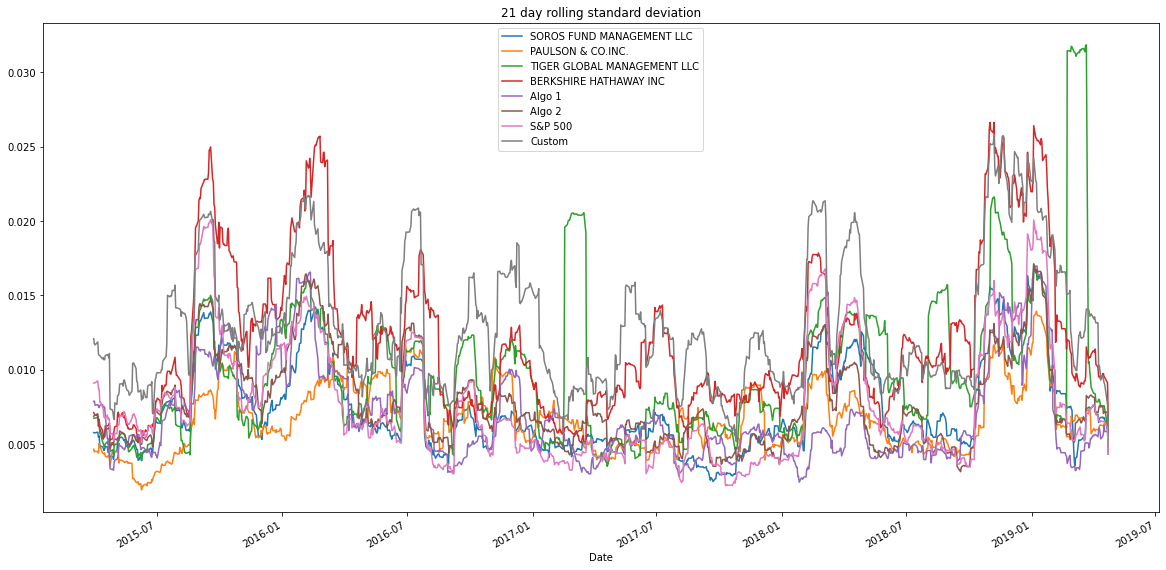

In [39]:
# Rolling
custom_std_21 = combined_custom_returns.rolling(window=window).std()

custom_std_21.plot(figsize=(20,10), title="21 day rolling standard deviation")

In [40]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (combined_custom_returns.mean() * 252) / (combined_custom_returns.std() * np.sqrt(252))
custom_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom                         1.222793
dtype: float64

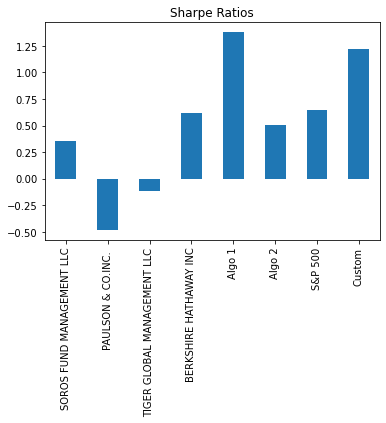

In [41]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

In [42]:
# Create a correlation analysis
custom_correlation = combined_custom_returns.corr()
custom_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.691400
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.559893
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.471863
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.683765
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.214738
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.717402
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.766742
Custom,0.691400,0.559893,0.471863,0.683765,0.214738,0.717402,0.766742,1.000000


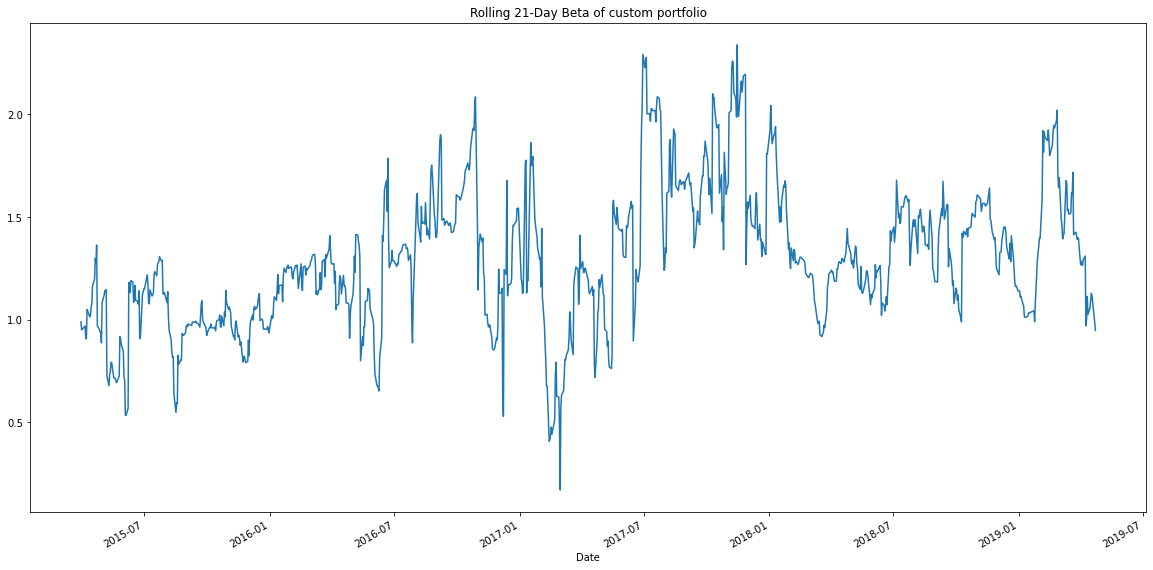

In [43]:
# Beta
rolling_custom_covariance = combined_custom_returns['Custom'].rolling(window=window).cov(combined_custom_returns['S&P 500'])

rolling_custom_beta = rolling_custom_covariance / rolling_variance
rolling_custom_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of custom portfolio')

My custom portfolio of Google, Nvidia, ADM, and Emergent Biosolutions had the highest standard deviation of all portfolios analyzed, and a rolling beta with many peaks and valleys around 1.5. This suggets a riskier portfolio that is very sensitive to movements in the S&P 500. However, the sharpe ratio suggests the returns were worth the risk as they competed with algo 2. 